In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Preparing the csv Sales data 
csv_file = "./Data/Sales.csv"
sales_df = pd.read_csv(csv_file)

sales_df.dropna()
sales_df.head()

C:\Users\mghan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Record_ID Date_of_Payment Recipient_Zip_Code  \
0  601890005      04/24/2018              52242   
1  601982005      10/08/2018              84132   
2  573426201      02/02/2018              97225   
3  613716105      01/17/2018              65212   
4  576948161      08/30/2018              20007   

   Total_Amount_of_Payment_USDollars  Teaching_Hospital_ID  \
0                           35708.00                6639.0   
1                            2315.00                7144.0   
2                             465.00                7183.0   
3                            1318.83                6652.0   
4                              52.50                6745.0   

               Teaching_Hospital_Name  
0   UNIVERSITY OF IOWA HOSP & CLINICS  
1          U OF U HOSPITALS & CLINICS  
2  PROVIDENCE ST. VINCENT MEDICAL CTR  
3        UNIV OF MISSOURI HEALTH CARE  
4      GEORGETOWN UNIVERSITY HOSPITAL

In [3]:
#Sales Dataframe Informations
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576011 entries, 0 to 576010
Data columns (total 6 columns):
Record_ID                            576011 non-null int64
Date_of_Payment                      576011 non-null object
Recipient_Zip_Code                   574976 non-null object
Total_Amount_of_Payment_USDollars    576011 non-null float64
Teaching_Hospital_ID                 103345 non-null float64
Teaching_Hospital_Name               103345 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 26.4+ MB


In [4]:
#Basic Statistical details about the Sales data
sales_df.describe()

Record_ID  Total_Amount_of_Payment_USDollars  Teaching_Hospital_ID
count  5.760110e+05                       5.760110e+05         103345.000000
mean   5.888375e+08                       8.488440e+03           6698.310958
std    1.937998e+07                       1.655196e+05            401.969635
min    5.211459e+08                       1.000000e-02           6026.000000
25%    5.766687e+08                       1.920000e+02           6385.000000
50%    5.930956e+08                       9.500000e+02           6764.000000
75%    6.050085e+08                       3.900350e+03           7039.000000
max    6.178436e+08                       7.674135e+07           7305.000000

In [5]:
# Calculate the Total Sales

Total_sales = sales_df["Total_Amount_of_Payment_USDollars"].sum().round(2)
Total_sales = f'Total Sales: ${Total_sales}'
Total_sales

'Total Sales: $4889435040.57'

In [6]:
#Formating the Date Column to get the groups by month
sales_df['Date_of_Payment'] = pd.to_datetime(sales_df['Date_of_Payment'])
sales_df.head()

Record_ID Date_of_Payment Recipient_Zip_Code  \
0  601890005      2018-04-24              52242   
1  601982005      2018-10-08              84132   
2  573426201      2018-02-02              97225   
3  613716105      2018-01-17              65212   
4  576948161      2018-08-30              20007   

   Total_Amount_of_Payment_USDollars  Teaching_Hospital_ID  \
0                           35708.00                6639.0   
1                            2315.00                7144.0   
2                             465.00                7183.0   
3                            1318.83                6652.0   
4                              52.50                6745.0   

               Teaching_Hospital_Name  
0   UNIVERSITY OF IOWA HOSP & CLINICS  
1          U OF U HOSPITALS & CLINICS  
2  PROVIDENCE ST. VINCENT MEDICAL CTR  
3        UNIV OF MISSOURI HEALTH CARE  
4      GEORGETOWN UNIVERSITY HOSPITAL

In [7]:
# Calculate the Total sales by month
Sales_by_month = sales_df.groupby(sales_df['Date_of_Payment'].dt.strftime('%B'))['Total_Amount_of_Payment_USDollars'].sum().sort_values()
Sales_by_month.apply(lambda x: '$%.2f' % x)

Date_of_Payment
September    $258594448.19
June         $306593448.28
August       $321418129.74
October      $338503086.61
July         $354132548.11
November     $362463964.99
May          $367900438.89
March        $404921088.52
December     $424116969.14
April        $436381177.81
February     $447772555.45
January      $866637184.84
Name: Total_Amount_of_Payment_USDollars, dtype: object

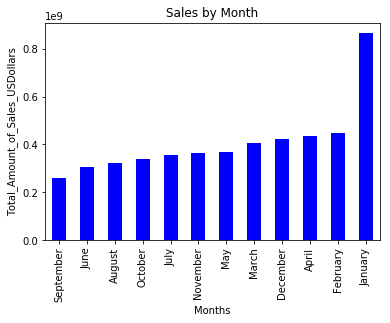

In [8]:
# Vizuallization through Chart for Total sales by month
Sales_by_month.plot(kind="bar", facecolor="blue")
# Set textual properties
plt.title("Sales by Month")
plt.ylabel("Total_Amount_of_Sales_USDollars")
plt.xlabel("Months")
plt.show()

In [7]:
# Calculating the Total sales by per zip code using group by method

Sales_per_zipcode = sales_df.groupby(['Recipient_Zip_Code'])['Total_Amount_of_Payment_USDollars'].sum().apply(lambda x: '%.2f' % x).sort_values(ascending=False).reset_index(name='Total Sales')

Sales_per_zipcode

Recipient_Zip_Code Total Sales
0             21229-5208     9993.00
1             87102-2512     9992.67
2             21162-5500    99902.42
3             11215-4027     9989.00
4                  60204   998767.75
5                  14203   998619.97
6                  60045     9982.40
7             44614-8669      998.07
8             48109-5362    99750.00
9                  27410    99745.64
10                 39289    99733.23
11            66720-1950    99718.91
12                 90403   997114.33
13                 33165   996504.98
14            99362-4445     9965.38
15            28054-7481   996236.11
16            47130-3769    99594.85
17                 63006     9957.45
18            07960-6459     9957.10
19                 43614   995547.67
20                 30513    99523.19
21                 33609   995132.93
22            33609-4038     9941.67
23            55413-2191     9940.00
24                 92856      994.51
25            19610-3359    99361.57
26            38174-1817     9935.90
27            33176-2230     9922.48
28                 29576    99206.38
29                 98375      992.00
...                  ...         ...
12690         92704-2347      100.00
12691         42003-3813      100.00
12692         95117-1712      100.00
12693         95037-5116      100.00
12694         95014-3236      100.00
12695         94558-6471      100.00
12696         92832-1945      100.00
12697              45103      100.00
12698         91405-3625      100.00
12699         97007-3234      100.00
12700         96161-4835      100.00
12701         90064-1608      100.00
12702         97034-3056      100.00
12703              98012      100.00
12704         92103-1408      100.00
12705         92101-8571      100.00
12706         92782-8909      100.00
12707         46845-1727      100.00
12708         94904-2000       10.00
12709              30042        1.82
12710              29465        1.82
12711              29944        1.44
12712              33711        1.44
12713              73129        1.44
12714              11207        1.44
12715              77096        1.44
12716              35773        1.44
12717              77539        1.36
12718              33424        1.30
12719         55431-3200        0.90

[12720 rows x 2 columns]

In [10]:
# Calculating the Total sales by per zip code(using Pivot table)
pivot_sales_zipcode = pd.pivot_table(sales_df,values='Total_Amount_of_Payment_USDollars', index=['Recipient_Zip_Code'] ,aggfunc=np.sum)
pivot_sales_zipcode

Total_Amount_of_Payment_USDollars
Recipient_Zip_Code                                   
00237                                        44058.80
00611                                       113106.00
00612                                        70745.22
00613                                         9839.30
00613-2770                                  579007.59
00646-4802                                    4576.00
00660                                         3659.65
00674                                       685322.29
00674-1100                                    5117.40
00680                                        17019.71
00680-3874                                      44.53
00681                                       301434.00
00681-3172                                    2000.00
00705                                       163112.50
00716                                       513811.42
00717                                       599132.45
00717-0953                                     451.93
00717-1379                                    7672.89
00725                                       497916.00
00725-2443                                    2281.40
00726                                       211895.81
00726-9809                                   45687.25
00727                                        38330.33
00727-9507                                    8990.00
00732                                       495975.27
00732-7004                                   10861.70
00733                                        24994.00
00736                                        14249.00
00739                                        37061.07
00745                                         5148.70
...                                               ...
99220                                       743100.73
99220-3868                                  217705.35
99260                                          785.00
99328                                         5662.00
99336                                       541883.02
99336-7774                                   64500.61
99352                                      1199529.34
99352-3301                                   17312.60
99352-4719                                     213.34
99352-4720                                    1924.49
99352-4853                                  424990.64
99352-9701                                   17477.00
99362                                       129536.96
99362-2935                                    7915.30
99362-3975                                      30.00
99362-4445                                    9965.38
99503                                       184328.29
99503-3902                                   97112.69
99503-3984                                  131093.76
99507                                        23920.00
99508                                       380633.94
99508-2982                                    1104.33
99508-4674                                   55990.00
99508-4684                                  129988.80
99508-5234                                    7501.20
99508-5300                                   57142.85
99509                                          387.20
99519                                        94194.33
99709                                         1598.00
99999                                          124.37

[12720 rows x 1 columns]

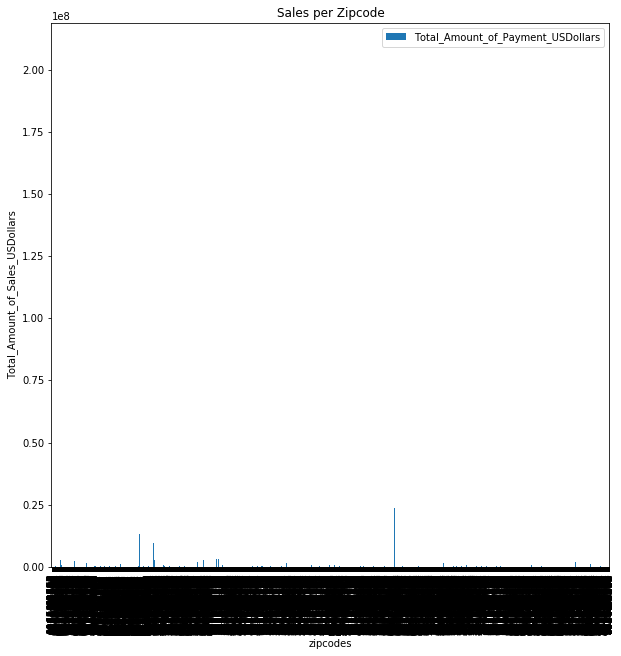

In [15]:
# Vizuallization through Chart for Total sales per zipcode

pivot_sales_zipcode.plot(kind="bar",figsize=(10,10))

plt.title("Sales per Zipcode")
plt.ylabel("Total_Amount_of_Sales_USDollars")
plt.xlabel("zipcodes")

plt.show()

In [16]:
# To get the Hospital type whether it is Teaching or Non Teaching

sales_df['Hospital_Type'] = sales_df['Teaching_Hospital_ID'].apply(lambda x: 'Non Teaching' if np.isnan(x) else 'Teaching')
sales_df.head(20)

Record_ID Date_of_Payment Recipient_Zip_Code  \
0   601890005      2018-04-24              52242   
1   601982005      2018-10-08              84132   
2   573426201      2018-02-02              97225   
3   613716105      2018-01-17              65212   
4   576948161      2018-08-30              20007   
5   535540813      2018-09-30              37232   
6   590720737      2018-06-08              92262   
7   566838963      2018-03-15              77030   
8   607104979      2018-08-20              90048   
9   615614153      2018-05-19              05401   
10  576948417      2018-09-29              20007   
11  601890663      2018-02-22              52722   
12  590721047      2018-04-23              84108   
13  606860355      2018-10-02              92868   
14  576948621      2018-11-14              20007   
15  601891619      2018-01-27         23249-0001   
16  601983415      2018-09-01              45229   
17  536780131      2018-10-09              53792   
18  590137925      2018-01-14              79905   
19  605005971      2018-01-31              10030   

    Total_Amount_of_Payment_USDollars  Teaching_Hospital_ID  \
0                            35708.00                6639.0   
1                             2315.00                7144.0   
2                              465.00                7183.0   
3                             1318.83                6652.0   
4                               52.50                6745.0   
5                            45690.00                6471.0   
6                              783.90                7058.0   
7                             4301.45                7039.0   
8                            19007.66                7268.0   
9                              247.00                   NaN   
10                            1761.48                6745.0   
11                           35955.00                6506.0   
12                            8955.00                7145.0   
13                              21.46                7281.0   
14                              94.50                6745.0   
15                              19.99                   NaN   
16                             101.34                6385.0   
17                           42452.00                6608.0   
18                             333.85                   NaN   
19                              34.30                6090.0   

                  Teaching_Hospital_Name Hospital_Type  
0      UNIVERSITY OF IOWA HOSP & CLINICS      Teaching  
1             U OF U HOSPITALS & CLINICS      Teaching  
2     PROVIDENCE ST. VINCENT MEDICAL CTR      Teaching  
3           UNIV OF MISSOURI HEALTH CARE      Teaching  
4         GEORGETOWN UNIVERSITY HOSPITAL      Teaching  
5   VANDERBILT UNIVERSITY MEDICAL CENTER      Teaching  
6                        DESERT HOSPITAL      Teaching  
7           UT MD ANDERSON CANCER CENTER      Teaching  
8            CEDARS-SINAI MEDICAL CENTER      Teaching  
9                                    NaN  Non Teaching  
10        GEORGETOWN UNIVERSITY HOSPITAL      Teaching  
11                    TRINITY BETTENDORF      Teaching  
12  U OF UTAH NEUROPSYCHIATRIC INSTITUTE      Teaching  
13                    UCI MEDICAL CENTER      Teaching  
14        GEORGETOWN UNIVERSITY HOSPITAL      Teaching  
15                                   NaN  Non Teaching  
16     CHILDRENS HOSPITAL MEDICAL CENTER      Teaching  
17  UNIVERSITY OF WI HOSPITALS & CLINICS      Teaching  
18                                   NaN  Non Teaching  
19       NORTH SHORE UNIVERSITY HOSPITAL      Teaching

In [17]:
# To get the total Sales by Hospital type 
Sales_per_HospitalType = sales_df.groupby(['Hospital_Type'])['Total_Amount_of_Payment_USDollars'].sum()


Sales_per_HospitalType.apply(lambda x: '$%.2f' % x)


Hospital_Type
Non Teaching    $3688304592.35
Teaching        $1201130448.22
Name: Total_Amount_of_Payment_USDollars, dtype: object

In [18]:
# Breaking down the Sales through Teaching and Non teaching by pivot table

# Filling the nan values with zero and making a new dataframe
Hospital_df =sales_df[['Hospital_Type','Teaching_Hospital_Name','Total_Amount_of_Payment_USDollars']].fillna("NA") 

pivot_sales = pd.pivot_table(Hospital_df,values='Total_Amount_of_Payment_USDollars', index=['Hospital_Type','Teaching_Hospital_Name'] ,aggfunc=np.sum)
pivot_sales

Total_Amount_of_Payment_USDollars
Hospital_Type Teaching_Hospital_Name                                                 
Non Teaching  NA                                                         3.688305e+09
Teaching      ABBOTT NORTHWESTERN HOSPITAL                               2.469419e+05
              ABINGTON MEMORIAL HOSPITAL                                 1.128454e+06
              ADENA REGIONAL MEDICAL CENTER                              2.842000e+03
              ADVENTIST HINSDALE HOSPITAL                                6.528591e+04
              ADVOCATE BROMENN MEDICAL CENTER                            1.215440e+06
              ADVOCATE CHRIST HOSPITAL                                   2.398037e+05
              ADVOCATE LUTHERAN GENERAL HOSPITAL                         6.928679e+04
              ADVOCATE NORTHSIDE HEALTH SYSTEM                           1.397250e+03
              AKRON GENERAL MEDICAL CENTER                               1.145328e+05
              ALAMEDA COUNTY MEDICAL CENTER                              9.644700e+04
              ALBANY MEDICAL CENTER HOSPITAL                             9.279472e+05
              ALBERT EINSTEIN MEDICAL CENTER                             2.284422e+05
              ALFRED I DUPONT HOSP FOR CHILDREN                          1.593199e+06
              ALLEGHENY GENERAL HOSPITAL                                 2.360702e+05
              ALTRU HEALTH SYSTEM-ALTRU HOSPITAL                         8.277364e+04
              AMERICAN ONCOLOGIC HOSPIAL                                 7.741711e+06
              ANMED HEALTH                                               2.712184e+05
              ANN & ROBERT H. LURIE CHILDRENS HOS                        5.467101e+06
              ANNE BATES LEACH EYE HOSPITAL                              7.846100e+02
              ARKANSAS CHILDRENS HOSPITAL                                1.903432e+05
              ARNOT-OGDEN MEDICAL CENTER                                 1.597747e+04
              ASPIRUS WAUSAU HOSPITAL                                    2.297353e+05
              ATHENS REGIONAL MEDICAL CENTER                             2.986126e+04
              ATLANTA MEDICAL CENTER                                     2.950000e+04
              ATLANTICARE REGIONAL MEDICAL CENTER                        5.659142e+04
              AULTMAN HOSPITAL                                           6.294003e+05
              AURORA HEALTH CARE METRO  INC.                             2.328606e+05
              AURORA HEALTH CARE METRO INC.                              1.106114e+06
              AUXILIO MUTUO HOSPITAL                                     2.602943e+06
...                                                                               ...
              WESTCHESTER MEDICAL CENTER                                 1.080912e+05
              WESTERN PENNSYLVANIA HOSPITAL                              8.372808e+05
              WESTSIDE REGIONAL MEDICAL CENTER                           3.225000e+03
              WHEATON FRANCISCAN  INC.                                   1.965363e+04
              WHEATON FRANCISCAN HEALTHCARE - ALL                        1.375375e+04
              WHEATON FRANCISCAN INC.                                    2.818349e+04
              WHEELING HOSPITAL                                          6.685000e+03
              WHITE COUNTY MEDICAL CENTER                                5.066175e+04
              WHITE MEMORIAL MEDICAL CENTER                              1.875490e+03
              WILLIAM BEAUMONT HOSPITAL - ROYAL OA                       7.745171e+05
              WILLIAM BEAUMONT HOSPITAL - TROY                           2.099803e+04
              WILLIS-KNIGHTON HEALTH SYSTEMS                             4.855131e+04
              WINCHESTER MEDICAL CENTER                                  7.550000e+04
              WINTHROP UNIVERSITY HOSPITAL                               1.604746e+06
          

([<matplotlib.patches.Wedge at 0x22b001a5048>,
 [Text(-0.7671362132594994, -0.7883540006278118, 'Non Teaching'),
  Text(0.8368758690103636, 0.8600225461394305, 'Teaching')],
 [Text(-0.41843793450518146, -0.4300112730697155, '75.4%'),
  Text(0.48817759025604535, 0.5016798185813345, '24.6%')])

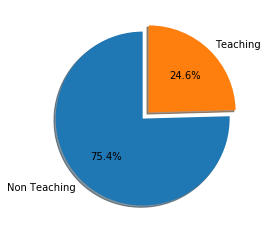

In [19]:
#Visualization for Breakdown of sales by teaching hospital vs non-teaching hospital(pie plots)

explode = (0, 0.1) 
plt.pie(Sales_per_HospitalType, explode=explode, labels=[ 'Non Teaching', 'Teaching'], autopct='%1.1f%%',
        shadow=True, startangle=90)


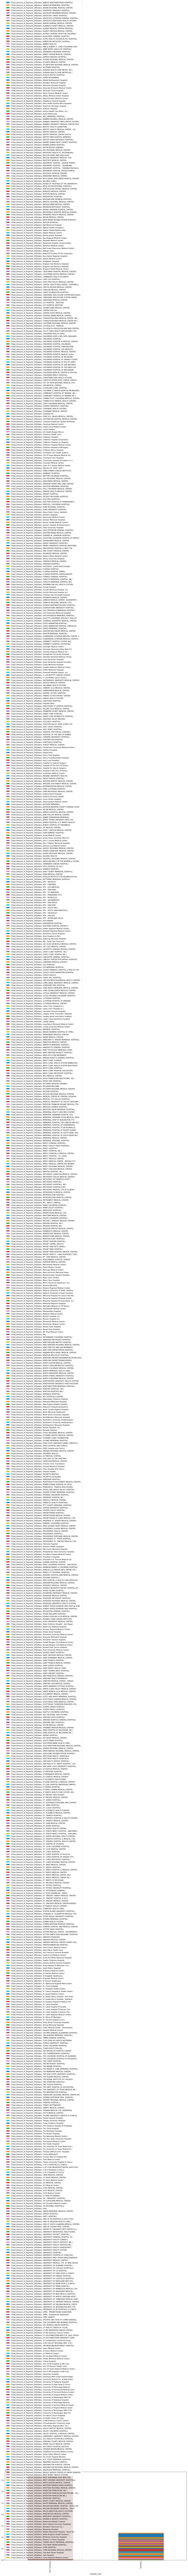

In [22]:
#Visualization for Breakdown of sales by teaching hospital vs non-teaching hospital(through Group bar)
Hospital_df.groupby(['Hospital_Type','Teaching_Hospital_Name']).sum().unstack().plot(kind='bar',legend=('0'),stacked=True,figsize=(20,10))
leg = plt.legend( loc = 'best')